In [12]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import ast

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
train = pd.read_csv("tmdb-box-office-prediction/train.csv")
test = pd.read_csv("tmdb-box-office-prediction/test.csv")

In [5]:
len(test)

4398

In [6]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [7]:
# get the datatypes of all columns
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [40]:
len(train)

3000

In [30]:
train.iloc[1].genres

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [28]:

len(ast.literal_eval(train.iloc[1].genres))

4

In [8]:
# check for null values
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# Data preprocessing & Feature engineering

In [9]:
# turn homepage into a binary column
len(train[train['homepage'].isna()])

2054

In [10]:
fn1 = lambda row: 0 if pd.isnull(row.homepage) else 1
fn2 = lambda row: 0 if pd.isnull(row.belongs_to_collection) else 1
fn3 = lambda row: 0 if pd.isnull(row.genres) else len(ast.literal_eval(row.genres))
fn4 = lambda row: 0 if pd.isnull(row.spoken_languages) else len(ast.literal_eval(row.spoken_languages))
fn5 = lambda row: 0 if pd.isnull(row.Keywords) else len(ast.literal_eval(row.Keywords))
fn6 = lambda row: 0 if pd.isnull(row.production_countries) else len(ast.literal_eval(row.production_countries))
fn7 = lambda row: 0 if pd.isnull(row.production_companies) else len(ast.literal_eval(row.production_companies))

In [13]:
train['homepage'] = train.apply(fn1, axis=1)
train['belongs_to_collection'] = train.apply(fn2, axis=1)
train['genres'] = train.apply(fn3, axis=1)
train['spoken_languages'] = train.apply(fn4, axis=1)
train['Keywords'] = train.apply(fn5, axis=1)
train['production_countries'] = train.apply(fn6, axis=1)
train['production_companies'] = train.apply(fn7, axis=1)
train['original_language'] = train['original_language'].astype('category')
train['status'] = train['status'].astype('category')
train['release_date'] = pd.to_datetime(train['release_date'])
# get just the year of the movie
train['release_date'] = [row.year for row in train['release_date']]
train['release_date'] = train['release_date'].astype('category')

In [14]:
train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,1,14000000,1,1,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015,93.0,1,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,4,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [15]:
# check status column value types
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [16]:
train['release_date'].head()

0    2015
1    2004
2    2014
3    2012
4    2009
Name: release_date, dtype: category
Categories (90, int64): [1969, 1970, 1971, 1972, ..., 2065, 2066, 2067, 2068]

In [17]:
train.release_date.value_counts()[:10]

2013    141
2015    128
2010    126
2012    125
2016    125
2011    124
2014    123
2006    114
2009    106
2007    105
Name: release_date, dtype: int64

# Model building

In [18]:
train_nonull = train.drop(['id', 'imdb_id', 'cast', 'crew', 
                'poster_path', 'tagline', 'title', 'overview', 'original_title'], axis=1).dropna()

In [19]:
len(train_nonull)

2998

In [20]:
X = train_nonull.drop(['revenue'], axis=1)
y = train_nonull['revenue']

In [21]:
X.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
original_language        0
popularity               0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
Keywords                 0
dtype: int64

In [22]:
# use label encoder
columns = ['original_language', 'status', 'release_date']
le = LabelEncoder()
for col in columns:
    X[col] = le.fit_transform(X[col])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
print("X_Train shape: ", X_train.shape)
print("Y_Train shape: ", y_train.shape)
print("X_Test shape:", X_test.shape)
print("y_test shape: ", y_test.shape)

X_Train shape:  (2248, 13)
Y_Train shape:  (2248,)
X_Test shape: (750, 13)
y_test shape:  (750,)


In [25]:
reg = LinearRegression().fit(X_train, y_train)

In [26]:
movie_revenue_y_preds = reg.predict(X_test)

In [27]:
reg.score(X_test, y_test)

0.5402790202177696

In [28]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, movie_revenue_y_preds))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, movie_revenue_y_preds))

Coefficients: 
 [ 0.00000000e+00  2.58052404e+00 -2.68756675e+06  5.70435077e-09
  7.06857305e+05  3.08696605e+06 -3.78291092e+06 -3.04579599e+06
 -1.94681819e+05  1.74993899e+05 -3.93481099e+06  1.01584480e+07
  9.52837847e+05]
Mean squared error: 6505154440428965.00
Variance score: 0.54


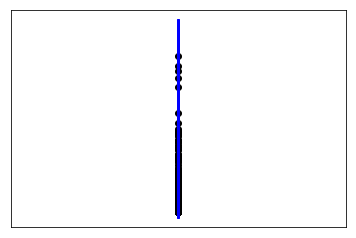

In [29]:
# Plot outputs
plt.scatter(X_test.values[:,0], y_test,  color='black')
plt.plot(X_test.values[:,0], movie_revenue_y_preds, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regr = RandomForestRegressor(n_estimators=30, random_state=42)

In [32]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [33]:
regr.score(X_train, y_train)

0.9429744566106001

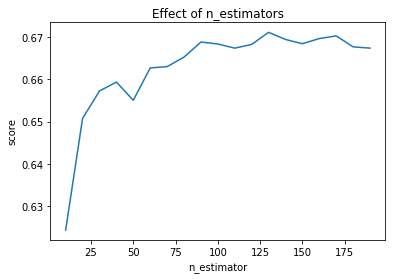

In [34]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regr.set_params(n_estimators=n)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Make Predictions on Test Data

In [75]:
# import test data
test = pd.read_csv("tmdb-box-office-prediction/test.csv")

In [76]:
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [77]:
len(test)

4398

In [78]:
test.drop(['imdb_id', 'cast', 'crew', 'tagline', 'poster_path',
                'title', 'overview', 'original_title'], axis=1).isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
original_language           0
popularity                  0
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
Keywords                  393
dtype: int64

In [79]:
print(test.runtime.mean())
print(test.release_date.mode())

107.6222121074192
0    9/9/11
dtype: object


In [63]:
train_nonull = train.drop(['imdb_id', 'cast', 'crew', 
                'poster_path', 'tagline', 'title', 'overview', 'original_title'], axis=1).dropna()

In [80]:
# preprocess the test data
test['homepage'] = test.apply(fn1, axis=1)
test['belongs_to_collection'] = test.apply(fn2, axis=1)
test['genres'] = test.apply(fn3, axis=1)
test['spoken_languages'] = test.apply(fn4, axis=1)
test['Keywords'] = test.apply(fn5, axis=1)
test['production_countries'] = test.apply(fn6, axis=1)
test['production_companies'] = test.apply(fn7, axis=1)
test['original_language'] = test['original_language'].astype('category')
test['status'] = test['status'].astype('category')
test.fillna({'release_date': test['release_date'].mode()}, inplace=True)
#test['release_date'].fillna(test['release_date'].mode(), inplace=True)
test['release_date'] = pd.to_datetime(test['release_date'])
test['release_date'] = [row.year for row in test['release_date']]
test['release_date'] = test['release_date'].astype('category')
test['status'].fillna('Released', inplace=True)
test['runtime'].fillna(test['runtime'].mean(), inplace=True)
test_nonull = test.drop(['id', 'imdb_id', 'cast', 'crew', 'poster_path', 'tagline',
                'title', 'overview', 'original_title'], axis=1)

In [82]:
test_nonull.loc[test.isnull().any(axis=1), 'release_date'] = 2014

In [83]:
print("test set size: ", len(test_nonull))
test_nonull.isnull().sum()

test set size:  4398


belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
original_language        0
popularity               0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
Keywords                 0
dtype: int64

In [84]:
# use label encoder
columns = ['original_language', 'status', 'release_date']
le = LabelEncoder()
for col in columns:
    test_nonull[col] = le.fit_transform(test_nonull[col])

In [85]:
test_nonull.head()

,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords
0,1,0,4,1,19,3.851534,0,2,38,90.0,2,1,2
1,0,88000,2,0,9,3.559789,1,1,78,65.0,1,1,8
2,0,0,2,0,9,8.085194,3,1,28,100.0,1,1,4
3,0,6800000,3,1,12,8.596012,3,2,41,130.0,3,1,15
4,0,2000000,2,0,9,3.217680,0,1,36,92.0,1,1,4


In [86]:
Xtest = test_nonull

In [87]:
regr.predict(Xtest)

array([14475435.46666667,  7484937.2       , 17458669.03333334, ...,
       43847542.        , 18058511.73333333, 17437511.23333333])

In [88]:
preds = pd.Series(regr.predict(Xtest))

In [89]:
len(preds)

4398

In [220]:
test_nonull.head()

,id,budget,homepage,original_language,popularity,release_date,runtime,status
0,3001,0,1,19,3.851534,44,90.0,1
1,3002,88000,0,9,3.559789,44,65.0,1
2,3003,0,0,9,8.085194,44,100.0,1
3,3004,6800000,1,12,8.596012,44,130.0,1
4,3005,2000000,0,9,3.217680,44,92.0,1


In [90]:
preds = regr.predict(Xtest)

In [93]:
d = {'id': test['id'].values, 'revenue': preds}
results = pd.DataFrame(d)

In [94]:
# save results to csv
results.to_csv("results.csv", header=True, index=False)